<a href="https://colab.research.google.com/github/DrakeJay/kardia/blob/main/kardia_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#torch stuff
import torch
import torch.nn as nn
import torch.optim as optim


#python openvision
#https://docs.opencv.org/4.x/dc/d84/group__core__basic.html
import cv2

#look into torch visio
'''
https://docs.pytorch.org/vision/stable/auto_examples/transforms/plot_transforms_getting_started.html#sphx-glr-auto-examples-transforms-plot-transforms-getting-started-py
'''
#for navigating/reading files
import os
print("Import done")

Import done


In [48]:

Train_path = '/content/drive/MyDrive/kaggle_data/competitions/physionet-ecg-image-digitization/train'
#print(Train)

Test_path = '/content/drive/MyDrive/kaggle_data/competitions/physionet-ecg-image-digitization/test'
#print(Test)

Train_csv = '/content/drive/MyDrive/kaggle_data/competitions/physionet-ecg-image-digitization/train.csv'
#print(Train_data)

Test_csv = '/content/drive/MyDrive/kaggle_data/competitions/physionet-ecg-image-digitization/test.csv'
#print(Test_data)

In [49]:
Test_csv
Train_csv

'/content/drive/MyDrive/kaggle_data/competitions/physionet-ecg-image-digitization/train.csv'

In [50]:
Train_data = pd.read_csv(Train_csv)

display(Train_data.head())

display(Train_data.info())

Train_data.describe()

id    fs  sig_len
0   7663343   500     5000
1  10140238  1000    10000
2  11842146  1000    10000
3  19030958   250     2500
4  19585145   512     5120

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       977 non-null    int64
 1   fs       977 non-null    int64
 2   sig_len  977 non-null    int64
dtypes: int64(3)
memory usage: 23.0 KB


None

id           fs       sig_len
count  9.770000e+02   977.000000    977.000000
mean   2.143116e+09   590.055271   5900.552712
std    1.296314e+09   315.892515   3158.925149
min    7.663343e+06   250.000000   2500.000000
25%    9.720851e+08   256.000000   2560.000000
50%    2.112147e+09   500.000000   5000.000000
75%    3.316191e+09  1000.000000  10000.000000
max    4.292119e+09  1025.000000  10250.000000

In [62]:
#lets choose a different set than this one
#image_folder_path = '/content/drive/MyDrive/kaggle_data/competitions/physionet-ecg-image-digitization/train/1006427285/'
image_folder_path = '/content/drive/MyDrive/kaggle_data/competitions/physionet-ecg-image-digitization/train/1006867983/'

#folder_csv = '/content/drive/MyDrive/kaggle_data/competitions/physionet-ecg-image-digitization/train/1006427285/1006427285.csv'
folder_csv = '/content/drive/MyDrive/kaggle_data/competitions/physionet-ecg-image-digitization/train/1006867983/1006867983.csv'

#enumerate/loop for the image files
#need just the png files f.endswith('.png')
image_files = [f for f in os.listdir(image_folder_path)

                 if os.path.isfile(os.path.join(image_folder_path, f))
                  and f.endswith('.png')]

print(image_files) #so reading the file name works, throw them into a image reader or whatever it is called

['1006867983-0004.png', '1006867983-0005.png', '1006867983-0003.png', '1006867983-0001.png', '1006867983-0009.png', '1006867983-0012.png', '1006867983-0010.png', '1006867983-0011.png', '1006867983-0006.png']


In [63]:
#info of the that specific folder of images, Figure out what columns represent exactly
folder_info = pd.read_csv(folder_csv)
folder_info.head()

I     II    III  aVR  aVL  aVF  V1  V2  V3  V4  V5  V6
0  0.331 -0.406 -0.738  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN
1  0.500 -0.693 -1.193  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN
2  0.429 -0.610 -1.040  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN
3  0.548 -0.576 -1.124  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN
4  0.639 -0.321 -0.961  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN

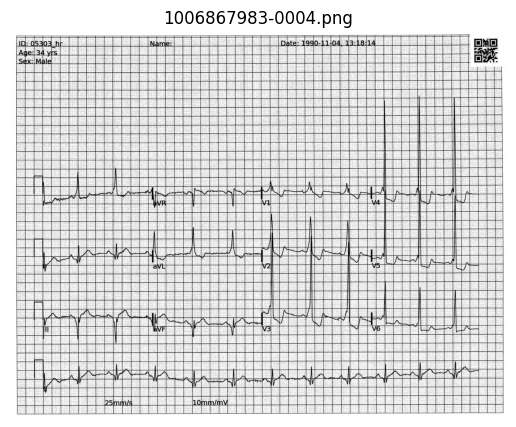

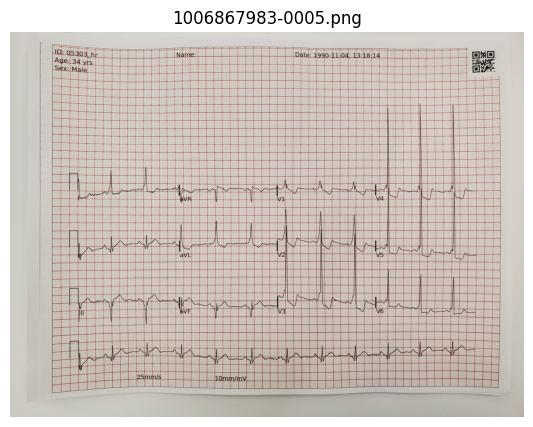

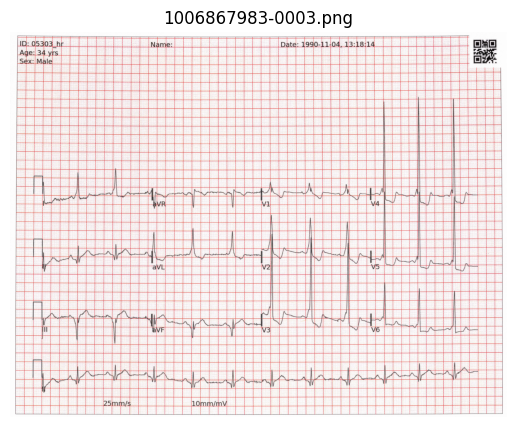

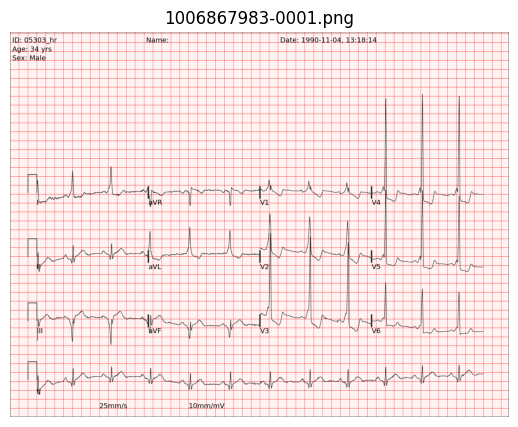

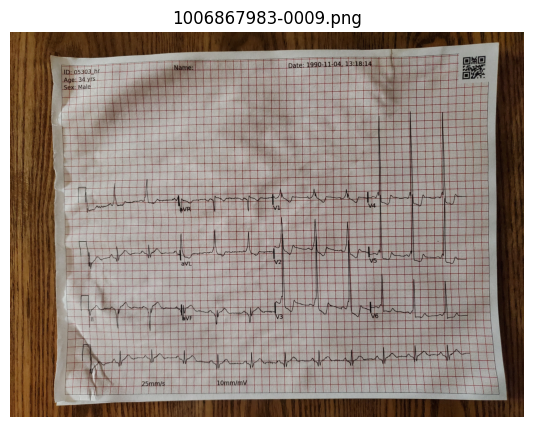

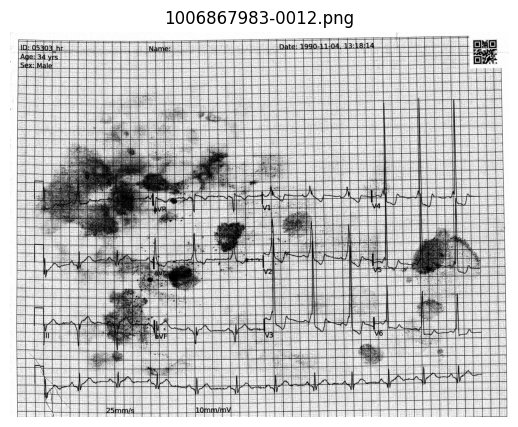

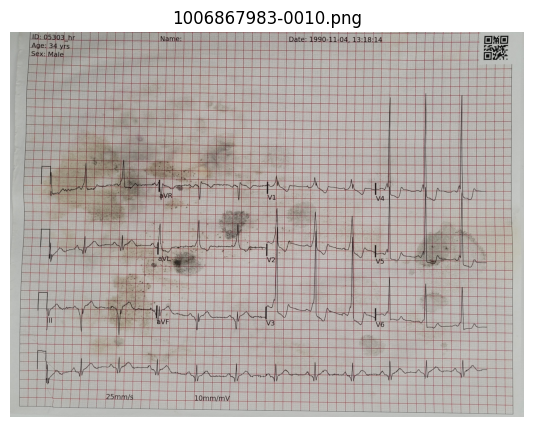

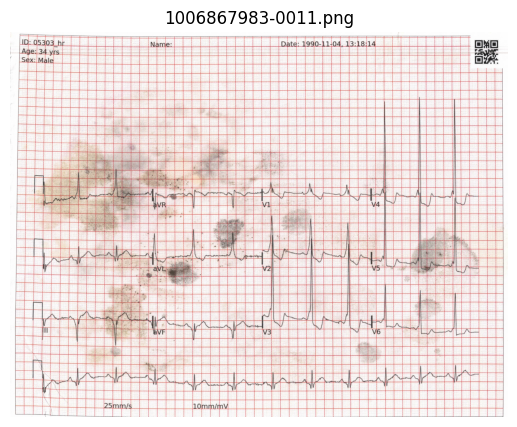

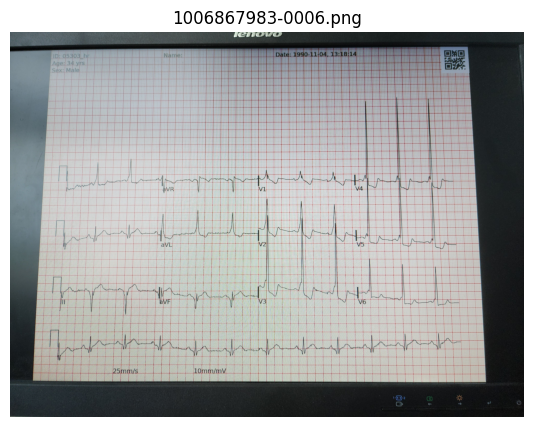

In [64]:
#use cv2 to read from image path

for image_file in image_files:
    image_path = os.path.join(image_folder_path, image_file)
    img = cv2.imread(image_path)

    # one of the images is giving an error trying to load or code bug idk, investigate
    #check if my file is corrupt..... or it is not working in the dataset normally
    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(image_file)
        plt.axis('off')
        plt.show()


    else:
        print(f"Could not load/show this: {image_file}")

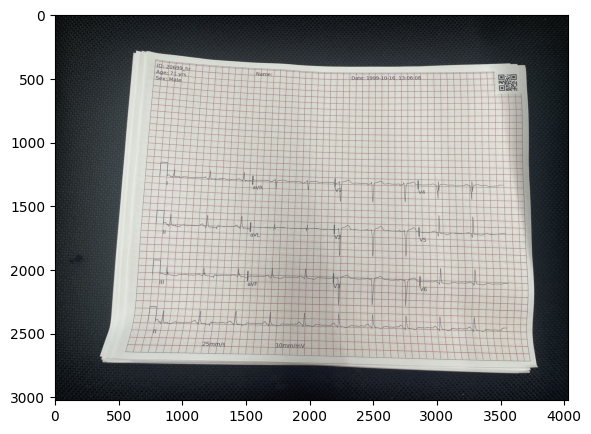

In [54]:
#Open an individual image for 0006.png, still error and redownloaded it on drive and reupload on drive and still issues. Other image folders work though
image05 = cv2.imread('/content/drive/MyDrive/kaggle_data/competitions/physionet-ecg-image-digitization/train/1006427285/1006427285-0005.png')
plt.imshow(cv2.cvtColor(image05, cv2.COLOR_BGR2RGB))

Using pytorch vision

https://docs.pytorch.org/vision/main/

https://github.com/pytorch/vision

In [55]:
from PIL import Image
from pathlib import Path
from torchvision.tv_tensors import KeyPoints
from torchvision.transforms import v2

In [56]:

#for the helper
#https://raw.githubusercontent.com/pytorch/vision/main/gallery/helpers.py

import sys
sys.path.append('/content/drive/MyDrive/kardia/')


#downloaded the helpers.py file and uploaded it to working directory folder
from helpers import plot


plt.rcParams["figure.figsize"] = [10, 5]


plt.rcParams["savefig.bbox"] = "tight"

# if you change the seed, make sure that the transformed output
# still make sense
torch.manual_seed(0)


/usr/local/lib/python3.12/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


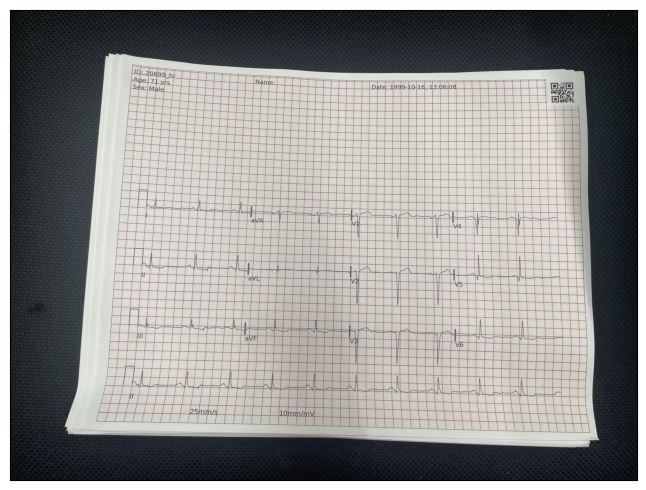

In [57]:
orig_img = Image.open(Path('/content/drive/MyDrive/kaggle_data/competitions/physionet-ecg-image-digitization/train/1006427285/') / '1006427285-0005.png')
# Convert the PIL Image to a PyTorch tensor

img_tensor = v2.ToTensor()(orig_img)


plot([(orig_img)])

In [77]:
# Step 1: Set the image folder path
image_folder_path_all = '/content/drive/MyDrive/kaggle_data/competitions/physionet-ecg-image-digitization/train/1006867983/'

# Step 2: Get the list of image files
image_files_all = [f for f in os.listdir(image_folder_path_all)
                 if os.path.isfile(os.path.join(image_folder_path_all, f))
                  and f.endswith('.png')]

print(f"Found {len(image_files_all)} images in the folder.")

Found 9 images in the folder.


Processing image: 1006867983-0004.png
Processing image: 1006867983-0005.png
Processing image: 1006867983-0003.png
Processing image: 1006867983-0001.png
Processing image: 1006867983-0009.png
Processing image: 1006867983-0012.png
Processing image: 1006867983-0010.png
Processing image: 1006867983-0011.png
Processing image: 1006867983-0006.png
Finished processing all images.


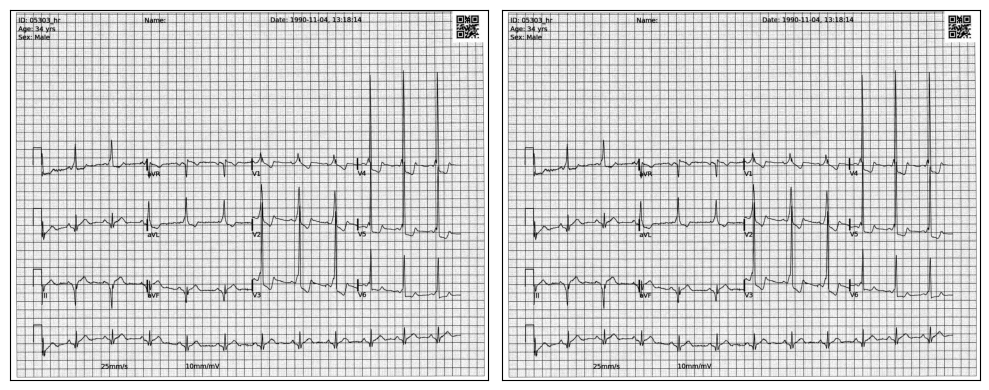

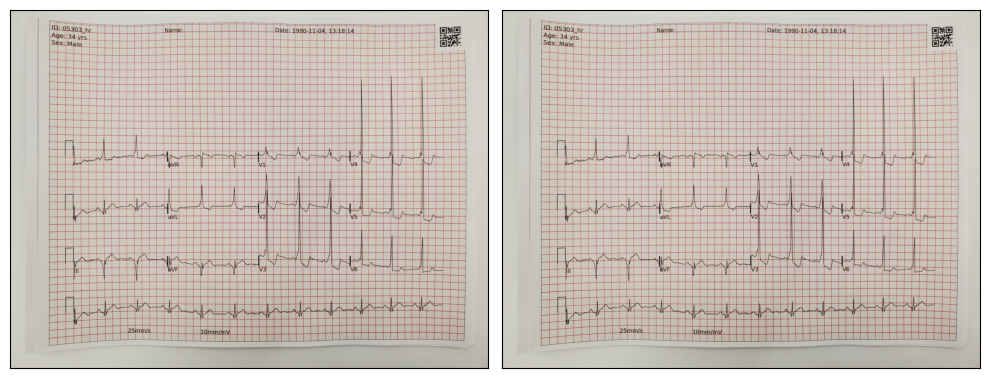

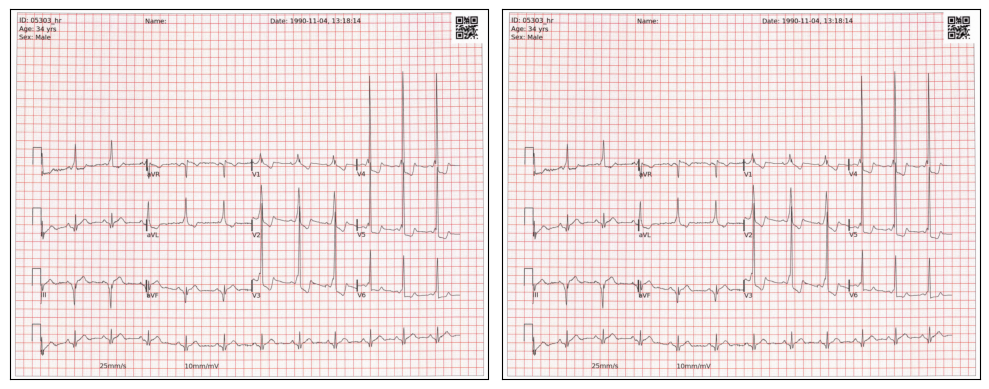

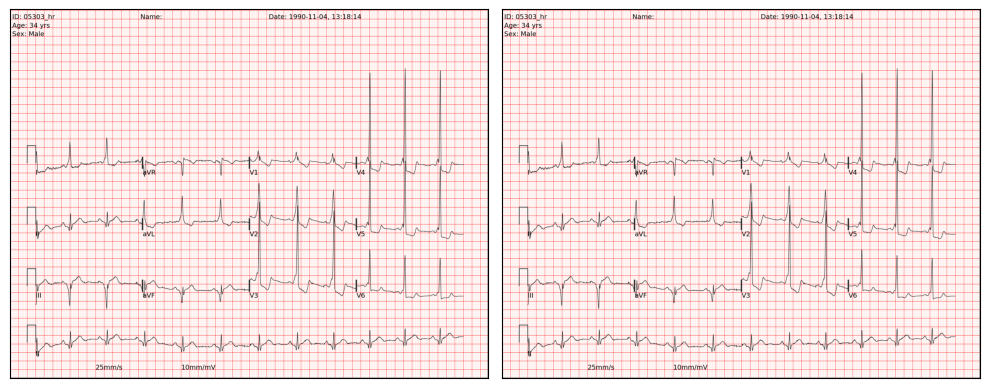

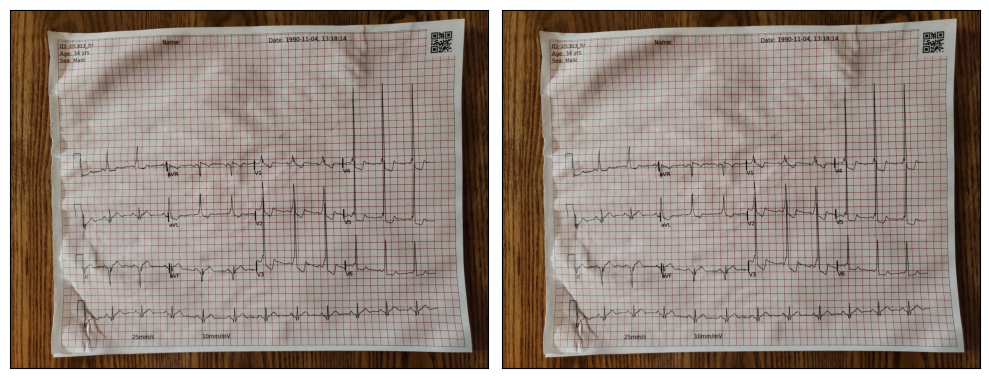

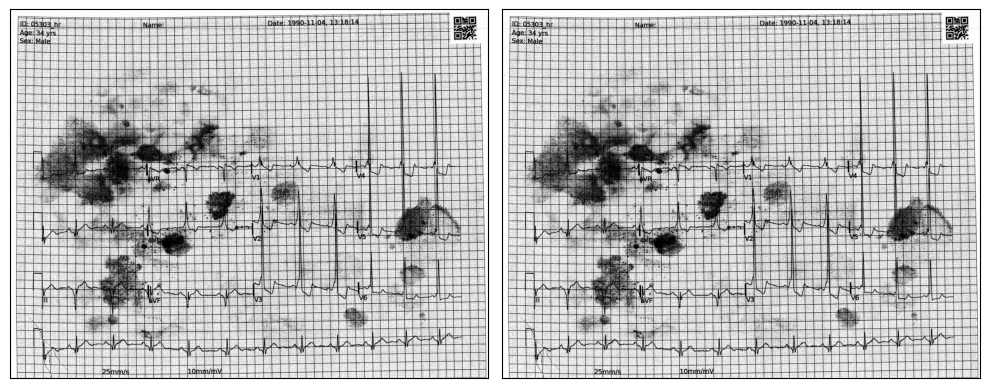

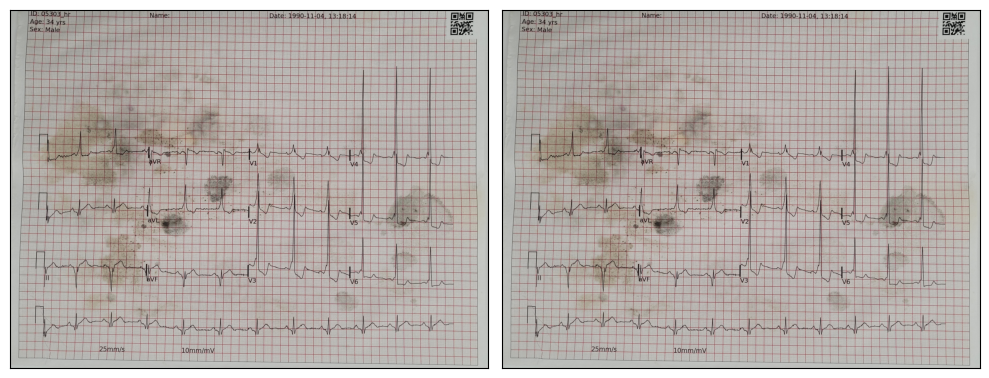

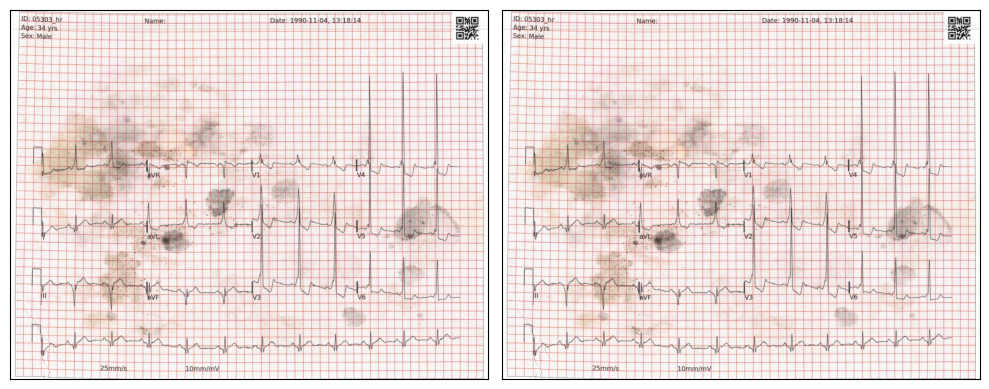

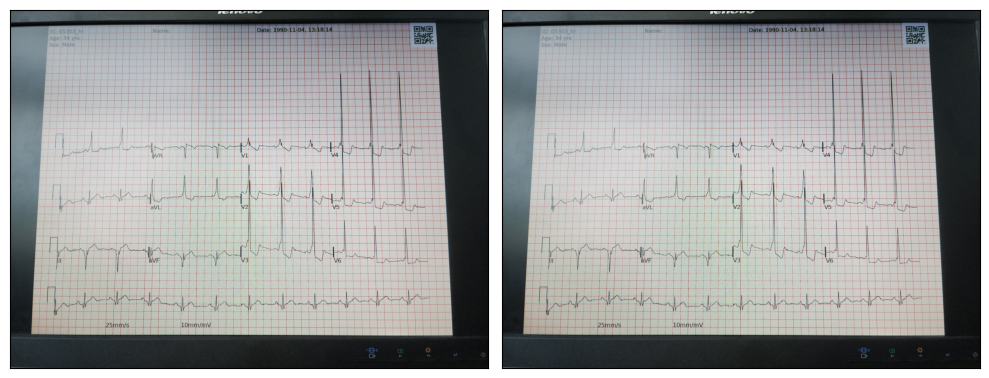

In [84]:
# https://docs.pytorch.org/vision/main/transforms.html
# If not, you would define it here:
# from torchvision.transforms import v2
'''
from torchvision.transforms import v2
transforms = v2.Compose([
    v2.ToImage(),  # Convert to tensor, only needed if you had a PIL image
    v2.ToDtype(torch.uint8, scale=True),  # optional, most input are already uint8 at this point
    # ...
    v2.RandomResizedCrop(size=(224, 224), antialias=True),  # Or Resize(antialias=True)
    # ...
    v2.ToDtype(torch.float32, scale=True),  # Normalize expects float input
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

'''

transforms = v2.Compose([

    #v2.RandomResizedCrop(size=(3000, 4000), antialias=True),
    v2.ToDtype(torch.uint8, scale=True),

    v2.RandomPhotometricDistort(p=0),

    v2.RandomHorizontalFlip(p=0),

    v2.ToDtype(torch.float32, scale=True),

])

#loop for all images in folder
for image_file in image_files_all:
    image_path = os.path.join(image_folder_path_all, image_file)
    try:
        # Load the image using PIL
        orig_img_all = Image.open(image_path)

        # Apply the transformations
        out_img_all = transforms(orig_img_all)

        # Plot the original and transformed image
        print(f"Processing image: {image_file}")

        plot([(orig_img_all), (out_img_all)])

    except Exception as e:
        #to catch any issues with loading ther image
        print(f"Could not process image {image_file}: {e}")

print("Finished processing all images.")

<class 'torchvision.tv_tensors._bounding_boxes.BoundingBoxes'> <class 'torchvision.tv_tensors._bounding_boxes.BoundingBoxes'>


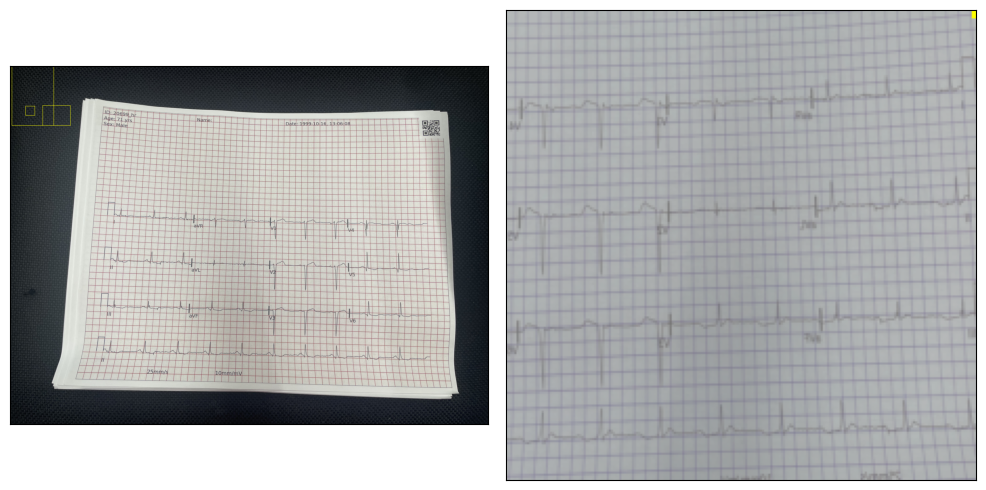

In [73]:
# playing with examples from https://docs.pytorch.org/vision/main/auto_examples/transforms/plot_transforms_getting_started.html#sphx-glr-auto-examples-transforms-plot-transforms-getting-started-py
# https://docs.pytorch.org/vision/main/auto_examples/transforms/plot_transforms_e2e.html#sphx-glr-auto-examples-transforms-plot-transforms-e2e-py
# https://docs.pytorch.org/vision/main/generated/torchvision.datasets.CocoDetection.html#torchvision.datasets.CocoDetection
'''
from torchvision import tv_tensors

boxes = tv_tensors.BoundingBoxes(
    [
        [15, 10, 370, 510],
        [275, 340, 510, 510],
        [130, 345, 210, 425]
    ],
    format="XYXY", canvas_size=orig_img.size[::-1]) # Use orig_img.size for canvas size

transforms = v2.Compose([
    v2.RandomResizedCrop(size=(224, 224), antialias=True),
    v2.RandomPhotometricDistort(p=1),
    v2.RandomHorizontalFlip(p=1),
])
out_img, out_boxes = transforms(orig_img, boxes) # Apply transforms to the image data
print(type(boxes), type(out_boxes))

plot([(orig_img, boxes), (out_img, out_boxes)]) # Plot the original and transformed image with boxe

'''

In [73]:
'''
https://docs.pytorch.org/vision/stable/feature_extraction.html

to grab defining features from the images



The torchvision.models.feature_extraction package contains feature extraction utilities that let us tap into our models to access intermediate transformations of our inputs. This could be useful for a variety of applications in computer vision. Just a few examples are:

    Visualizing feature maps.

    Extracting features to compute image descriptors for tasks like facial recognition, copy-detection, or image retrieval.

    Passing selected features to downstream sub-networks for end-to-end training with a specific task in mind. For example, passing a hierarchy of features to a Feature Pyramid Network with object detection heads.

Torchvision provides create_feature_extractor() for this purpose. It works by following roughly these steps:

    Symbolically tracing the model to get a graphical representation of how it transforms the input, step by step.

    Setting the user-selected graph nodes as outputs.

    Removing all redundant nodes (anything downstream of the output nodes).

    Generating python code from the resulting graph and bundling that into a PyTorch module together with the graph itself.

'''